**Data Preparation & EDA**

/tmp/ipython-input-1660476813.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('NFLX', start='2019-01-01', end='2025-12-20')
[*********************100%***********************]  1 of 1 completed


Dataset berhasil didownload dan disimpan!



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Contoh Data:
Price           Close       High        Low       Open     Volume
Ticker           NFLX       NFLX       NFLX       NFLX       NFLX
Date                                                             
2019-01-02  26.766001  26.975000  25.658001  25.927999  116795000
2019-01-03  27.120001  27.579000  26.443001  27.020000  149696000
2019-01-04  29.757000  29.780001  27.854000  28.188000  193301000
2019-01-07  31.534000  31.680000  30.165001  30.209999  186201000
2019-01-08  32.027000  32.058998  30.801001  31.997999  153592000

Statistik Deskriptif:
Price         Close         High          Low         Open        Volume
Ticker         NFLX         NFLX         NFLX         NFLX          NFLX
count   1753.000000  1753.000000  1753.000000  1753.000000  1.753000e+03
mean      53.766596    54.498023    52.991166    53.748230  6.246054e+07
std       27.104620    27.360561    26.813694    27.105344  5.778859e+07
min       16.636999    17.205999    16.271000    16.396000  1.144000e+0

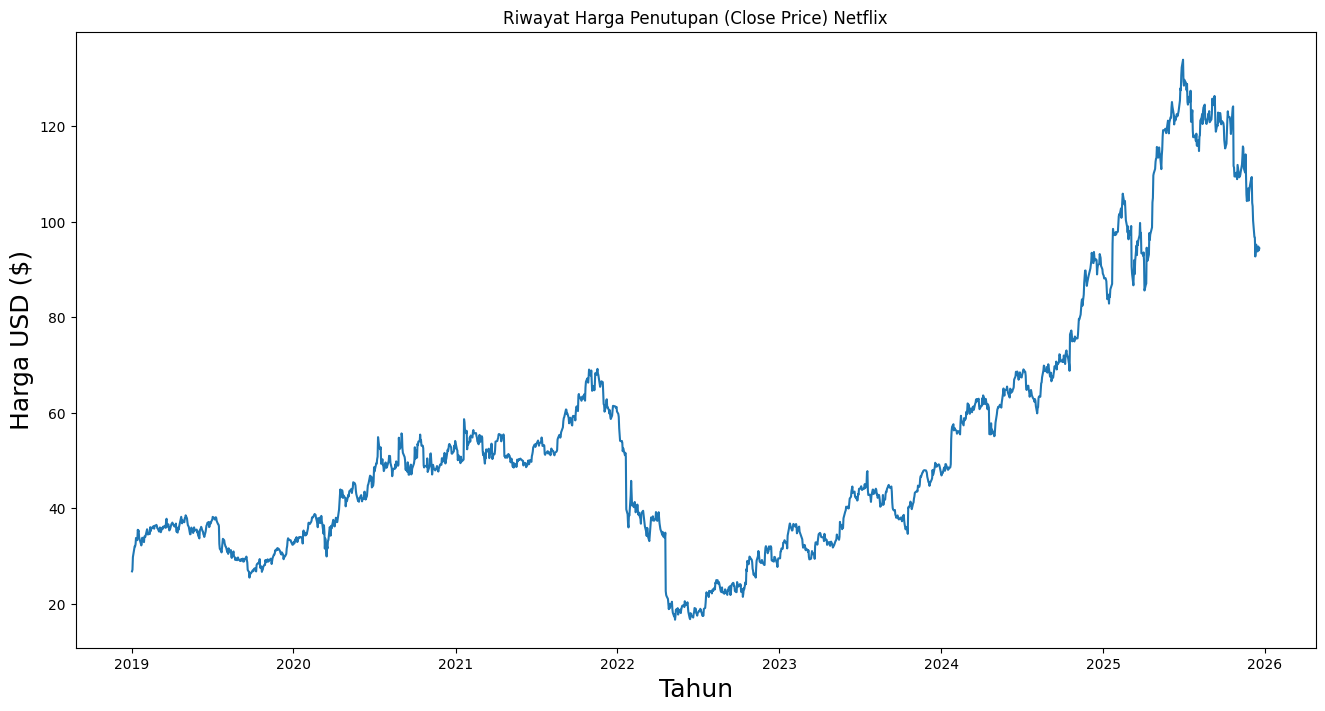

In [ ]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. PENGUMPULAN DATA ---
# Mengambil data saham Netflix dari 2019 s/d Akhir 2025
# Kita gunakan kode 'NFLX'
df = yf.download('NFLX', start='2019-01-01', end='2025-12-20')
from keras.models import Sequential
from keras.layers import Dense, LSTM

# (Opsional) menyimpan jadi CSV di dalam Colab
df.to_csv('NFLX_dataset.csv')
print("\nDataset berhasil didownload dan disimpan!")

# --- MEMBANGUN MODEL ---
# Kita inisialisasi model Sequential (tumpukan layer)
model = Sequential()

# LAYER 1: LSTM
# units=50: Ada 50 neuron ingatan di layer ini
# return_sequences=True: Wajib True jika layer setelahnya adalah LSTM juga
# input_shape: Memberitahu model ukuran data masuk (60 hari ke belakang)
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# LAYER 2: LSTM
# return_sequences=False: Karena setelah ini kita masuk ke Dense Layer (bukan LSTM lagi)
model.add(LSTM(units=50, return_sequences=False))

# LAYER 3: DENSE (Fully Connected)
# Layer perantara untuk menyederhanakan informasi dari 50 neuron menjadi 25
model.add(Dense(units=25))

# LAYER 4: OUTPUT
# units=1: Karena kita hanya ingin memprediksi 1 angka (Harga Saham Besok)
model.add(Dense(units=1))

# --- COMPILE MODEL ---
# optimizer='adam': Algoritma optimasi paling populer dan efisien
# loss='mean_squared_error': Cara model menghitung kesalahannya (selisih kuadrat)
model.compile(optimizer='adam', loss='mean_squared_error')

# Tampilkan Ringkasan Model (PENTING UNTUK LAPORAN)
model.summary()

# --- 2. EDA (EXPLORATORY DATA ANALYSIS) ---
# Menampilkan 5 data teratas
print("Contoh Data:")
print(df.head())

# Menampilkan Statistik Dasar (Mean, Median/50%, Std Dev)
# INI PENTING UNTUK LAPORAN (Univariate Analysis)
print("\nStatistik Deskriptif:")
print(df.describe())

# Visualisasi Tren Harga (Bivariate Analysis: Tanggal vs Harga)
plt.figure(figsize=(16,8))
plt.title('Riwayat Harga Penutupan (Close Price) Netflix')
plt.plot(df['Close'])
plt.xlabel('Tahun', fontsize=18)
plt.ylabel('Harga USD ($)', fontsize=18)
plt.show()

**Pre-Processing & Feature Engineering**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd # Pastikan pandas terimport

# --- PERBAIKAN STRUKTUR DATA (FIX YFINANCE BUG) ---
# Cek apakah kolomnya bertingkat (MultiIndex), jika ya, kita ratakan
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Cek nama kolom untuk memastikan 'Close' ada
print("Nama Kolom yang tersedia:", df.columns)

# --- 3. PRE-PROCESSING ---
# Ambil kolom 'Close'.
# Kita pakai cara yang lebih aman (df[['Close']]) daripada .filter
# agar kalau error langsung ketahuan, bukan silent error.
try:
    data = df[['Close']]
except KeyError:
    # Fallback jika nama kolomnya 'adj close' atau lainnya
    print("Kolom 'Close' tidak ditemukan, mencoba 'Adj Close'...")
    data = df[['Adj Close']]

dataset = data.values

# Konversi ke float agar presisi
dataset = dataset.astype('float32')

# --- 4. FEATURE ENGINEERING BAGIAN 1: SCALING ---
# LSTM sensitif sama angka besar, jadi kita ubah ke range 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# INI BAGIAN YANG TADI ERROR
# Sekarang harusnya aman karena 'dataset' sudah pasti punya 1 kolom
scaled_data = scaler.fit_transform(dataset)

print(f"Sukses! Shape data sekarang: {scaled_data.shape}")
# Harusnya outputnya: (1509, 1)

# Menentukan jumlah data training (80%) dan testing (20%)
training_data_len = math.ceil(len(dataset) * 0.8)

# --- 5. FEATURE ENGINEERING BAGIAN 2: SLIDING WINDOW ---
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Ubah ke numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape ke bentuk 3D untuk input LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("Shape data training final:", x_train.shape)

Nama Kolom yang tersedia: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Sukses! Shape data sekarang: (1753, 1)
Shape data training final: (1343, 60, 1)


**Modeling (Membangun Arsitektur Neural Network)**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input # Tambahkan import 'Input'

# --- MEMBANGUN MODEL (VERSI FIX WARNING) ---
model = Sequential()

# LAYER KHUSUS INPUT (Ini cara barunya)
# Kita definisikan bentuk data masuk di sini agar tidak kena warning
model.add(Input(shape=(x_train.shape[1], 1)))

# LAYER 1: LSTM
# Hapus parameter 'input_shape' di sini karena sudah ditangani layer Input di atas
model.add(LSTM(units=50, return_sequences=True))

# LAYER 2: LSTM
model.add(LSTM(units=50, return_sequences=False))

# LAYER 3: DENSE
model.add(Dense(units=25))

# LAYER 4: OUTPUT
model.add(Dense(units=1))

# --- COMPILE MODEL ---
model.compile(optimizer='adam', loss='mean_squared_error')

# Tampilkan Ringkasan
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

**Training**

Mulai proses training... Mohon tunggu sebentar.
Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0125
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.9442e-04
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 4.9034e-04
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.9374e-04
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 3.8771e-04
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 4.5115e-04
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 3.6184e-04
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 3.5619e-04
Epoch 9/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 3.2641e-04
Epoch 10/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 3.4547e-04
Epoch 11/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 2.9325e-04
Epoch 12/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 2.9410e-04
Epoch 13/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 2.7605e-04
Epoch 14/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 

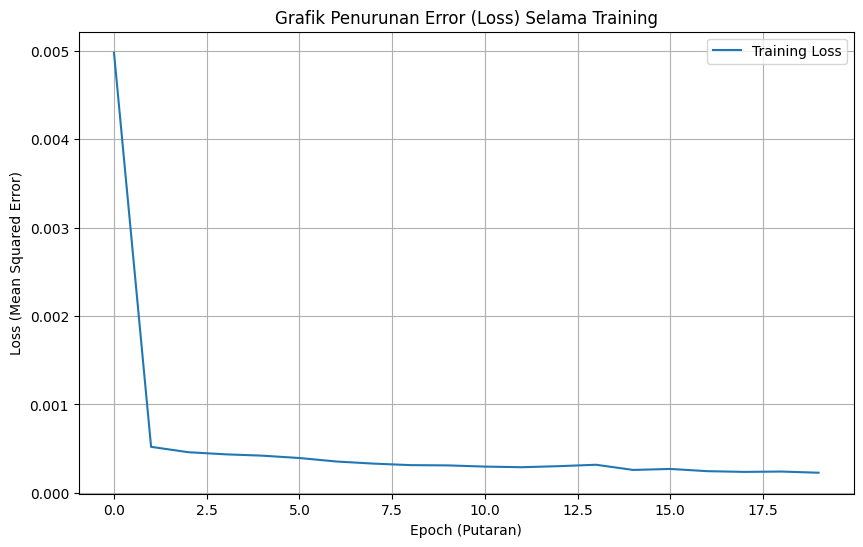

In [ ]:
import matplotlib.pyplot as plt

# --- MELATIH MODEL ---
# Kita simpan proses belajarnya ke dalam variabel 'history'
# agar nanti bisa kita buat grafik perkembangannya.
print("Mulai proses training... Mohon tunggu sebentar.")

# epochs=20: Model akan mengulang materi pelajaran sebanyak 20 kali putaran.
# batch_size=32: Model belajar 32 hari data sekaligus dalam satu suapan.
history = model.fit(x_train, y_train, batch_size=32, epochs=20)

print("Training selesai!")

# --- VISUALISASI HASIL BELAJAR (GRAFIK LOSS) ---
# Grafik ini WAJIB ada di Laporan Bab 4 (Hasil & Pembahasan)
# Tujuannya membuktikan bahwa model semakin pintar (errornya makin turun).
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Grafik Penurunan Error (Loss) Selama Training')
plt.xlabel('Epoch (Putaran)')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

**Evaluasi & Validasi**

Sedang memprediksi harga...
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step

📊 HASIL EVALUASI MODEL
1. Root Mean Squared Error (RMSE) : 3.6763
   -> Rata-rata meleset sekitar   : $3.68 USD
--------------------------------------------------
2. Mean Absolute Percentage Error : 0.0282
   -> Persentase Error (MAPE)     : 2.82%


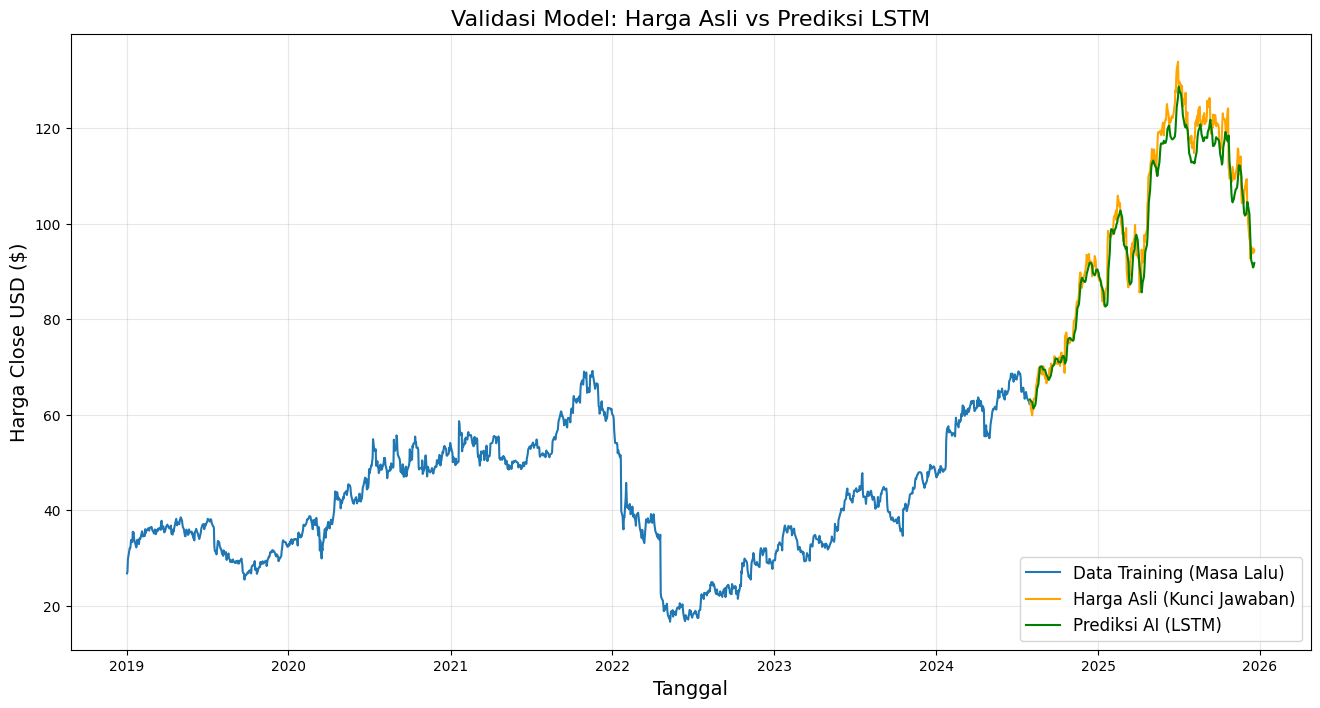


Contoh Perbandingan Harga (5 Hari Terakhir):
                Close  Predictions
Date                              
2025-12-15  93.769997    91.390121
2025-12-16  94.570000    90.838814
2025-12-17  94.790001    90.889503
2025-12-18  94.000000    91.330376
2025-12-19  94.389999    91.759827


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# --- 1. PERSIAPAN DATA TEST ---
# Kita ambil data dari akhir training, mundur 60 hari ke belakang
test_data = scaled_data[training_data_len - 60: , :]

# Buat wadah x_test dan y_test
x_test = []
y_test = dataset[training_data_len:, :] # Kunci jawaban (Harga Asli)

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert ke numpy array & Reshape ke 3D
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# --- 2. PREDIKSI ---
print("Sedang memprediksi harga...")
predictions = model.predict(x_test)

# Kembalikan angka 0-1 menjadi Harga Asli USD (Inverse Transform)
predictions = scaler.inverse_transform(predictions)

# --- 3. HITUNG AKURASI (RMSE & MAPE) ---
# A. Hitung RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# B. Hitung MAPE
# (Pastikan y_test dan predictions memiliki shape yang sama)
mape = mean_absolute_percentage_error(y_test, predictions)

print("\n" + "="*50)
print(f"📊 HASIL EVALUASI MODEL")
print("="*50)
print(f"1. Root Mean Squared Error (RMSE) : {rmse:.4f}")
print(f"   -> Rata-rata meleset sekitar   : ${rmse:.2f} USD")
print("-" * 50)
print(f"2. Mean Absolute Percentage Error : {mape:.4f}")
print(f"   -> Persentase Error (MAPE)     : {mape*100:.2f}%")
print("="*50)

# --- 4. VISUALISASI HASIL ---
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Validasi Model: Harga Asli vs Prediksi LSTM', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Harga Close USD ($)', fontsize=14)

plt.plot(train['Close'], label='Data Training (Masa Lalu)')
plt.plot(valid['Close'], label='Harga Asli (Kunci Jawaban)', color='orange')
plt.plot(valid['Predictions'], label='Prediksi AI (LSTM)', color='green')

plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Intip sedikit datanya
print("\nContoh Perbandingan Harga (5 Hari Terakhir):")
print(valid[['Close', 'Predictions']].tail(5))

**Menyimpan Model**

In [ ]:
# --- LANGKAH 6: SIMPAN MODEL ---
# Kita simpan dengan nama file yang jelas
model.save('model_netflix_lstm.h5') # Format standar Keras lama
model.save('model_netflix_lstm.keras') # Format standar Keras baru (opsional)

print("Model berhasil diamankan! File 'model_netflix_lstm.h5' siap dipakai untuk Deployment.")

Model berhasil diamankan! File 'model_netflix_lstm.h5' siap dipakai untuk Deployment.
